In [6]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


import fn_plot_full_samp_wf as FN 



    

In [7]:
def plot_full_samp_wf(ssp,folder,samp,component,loc):

    if ssp=="ssp126" or ssp=="ssp585":
        WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f','wf_4']
        fig, axs = plt.subplots(nrows=7, ncols=6, figsize=(12*1.5, 5*4))
    elif ssp=="ssp119" or ssp=="ssp245":    
        WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f']
        fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(12*1.5, 5*4))
    elif ssp=="ssp370":
        WF=['wf_1e','wf_1f','wf_2e','wf_2f']
        fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(12*1.5, 5*4))



    for i, wf in enumerate(WF):
        pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
        pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
        #
        fileG=fileNAME(pathG,component)#'icesheets-ipccar6-ismipemuicesheet-{arg0}_GIS_localsl.nc'.format(arg0=ssp) 
        fileP=fileNAME(pathP,component)#'nzOG.{arg0}.emuGrIS.emulandice.GrIS_localsl.nc'.format(arg0=ssp)
        var='sea_level_change'
        # labels
        EXP_G=pathG.split('/')[3].split('_')[0];   EXP_P=pathP.split('/')[4].split('-')[1];   EXP_file=fileP; 
        #
        d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]
        #
        yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
        yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]
        #
        sampIDX_G, sampIDX_P=[np.searchsorted(d['samples'].values, samp) for d in [d_ncG, d_ncP]]
        #         
        latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

        # Compute the difference. 
        slcG=d_ncG[var][sampIDX_G, yrIDX_G, loc];       slcP=d_ncP[var][sampIDX_P, yrIDX_P, loc]
        slcG_reshaped = slcG.values.reshape(-1);        slcP_reshaped = slcP.values.reshape(-1)
        diff = slcG_reshaped - slcP_reshaped;           diff = np.reshape(diff, slcG.shape)

        # X-axis
        xx=d_ncG['years'][yrIDX_G].values

        for sam0,sam1 in enumerate(samp):
            row, col = i, sam0
            ax = axs[row, col]
            
            for lo0,lo1 in enumerate(loc):
                yyD=np.squeeze(diff[sam0,:,lo0])
                yy1=np.squeeze(slcG[sam0,:,lo0])
                yy2=np.squeeze(slcP[sam0,:,lo0])
                #
                ax.plot(xx, yy1, label='G')
                ax.plot(xx, yy2, linestyle='--', label='P')
    #             ax.plot(xx, yy1, label=str(latP[lo0])+" , "+str(lonP[lo0]))
                #
                ax.grid(alpha=0.95)
                ax.text(.55, .1,ssp+' :: '+wf, fontsize=7, color='blue', transform=ax.transAxes, ha='left', va='center')
                ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
                ax.tick_params(axis='x', labelsize=6)
                ax.tick_params(axis='y', labelsize=7)
                if lo0<1: 
                    ax.legend(fontsize='small')
                # Xlabels
                if row==6 and col in (0, 1, 2, 3, 4, 5, 6):
                    ax.tick_params(axis='x', labelrotation=45,labelsize=10)
                
                # Ylabels
                if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                    ax.set_ylabel('slc (mm)', fontsize=10); #ax.set_xlabel('Years')
                
                if row==0 and col in (0, 1, 2, 3, 4, 5):
                    SAMP=str(sam1)
                    ax.set_title(SAMP+' Sample' ,fontsize=10)
           
                
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.show()

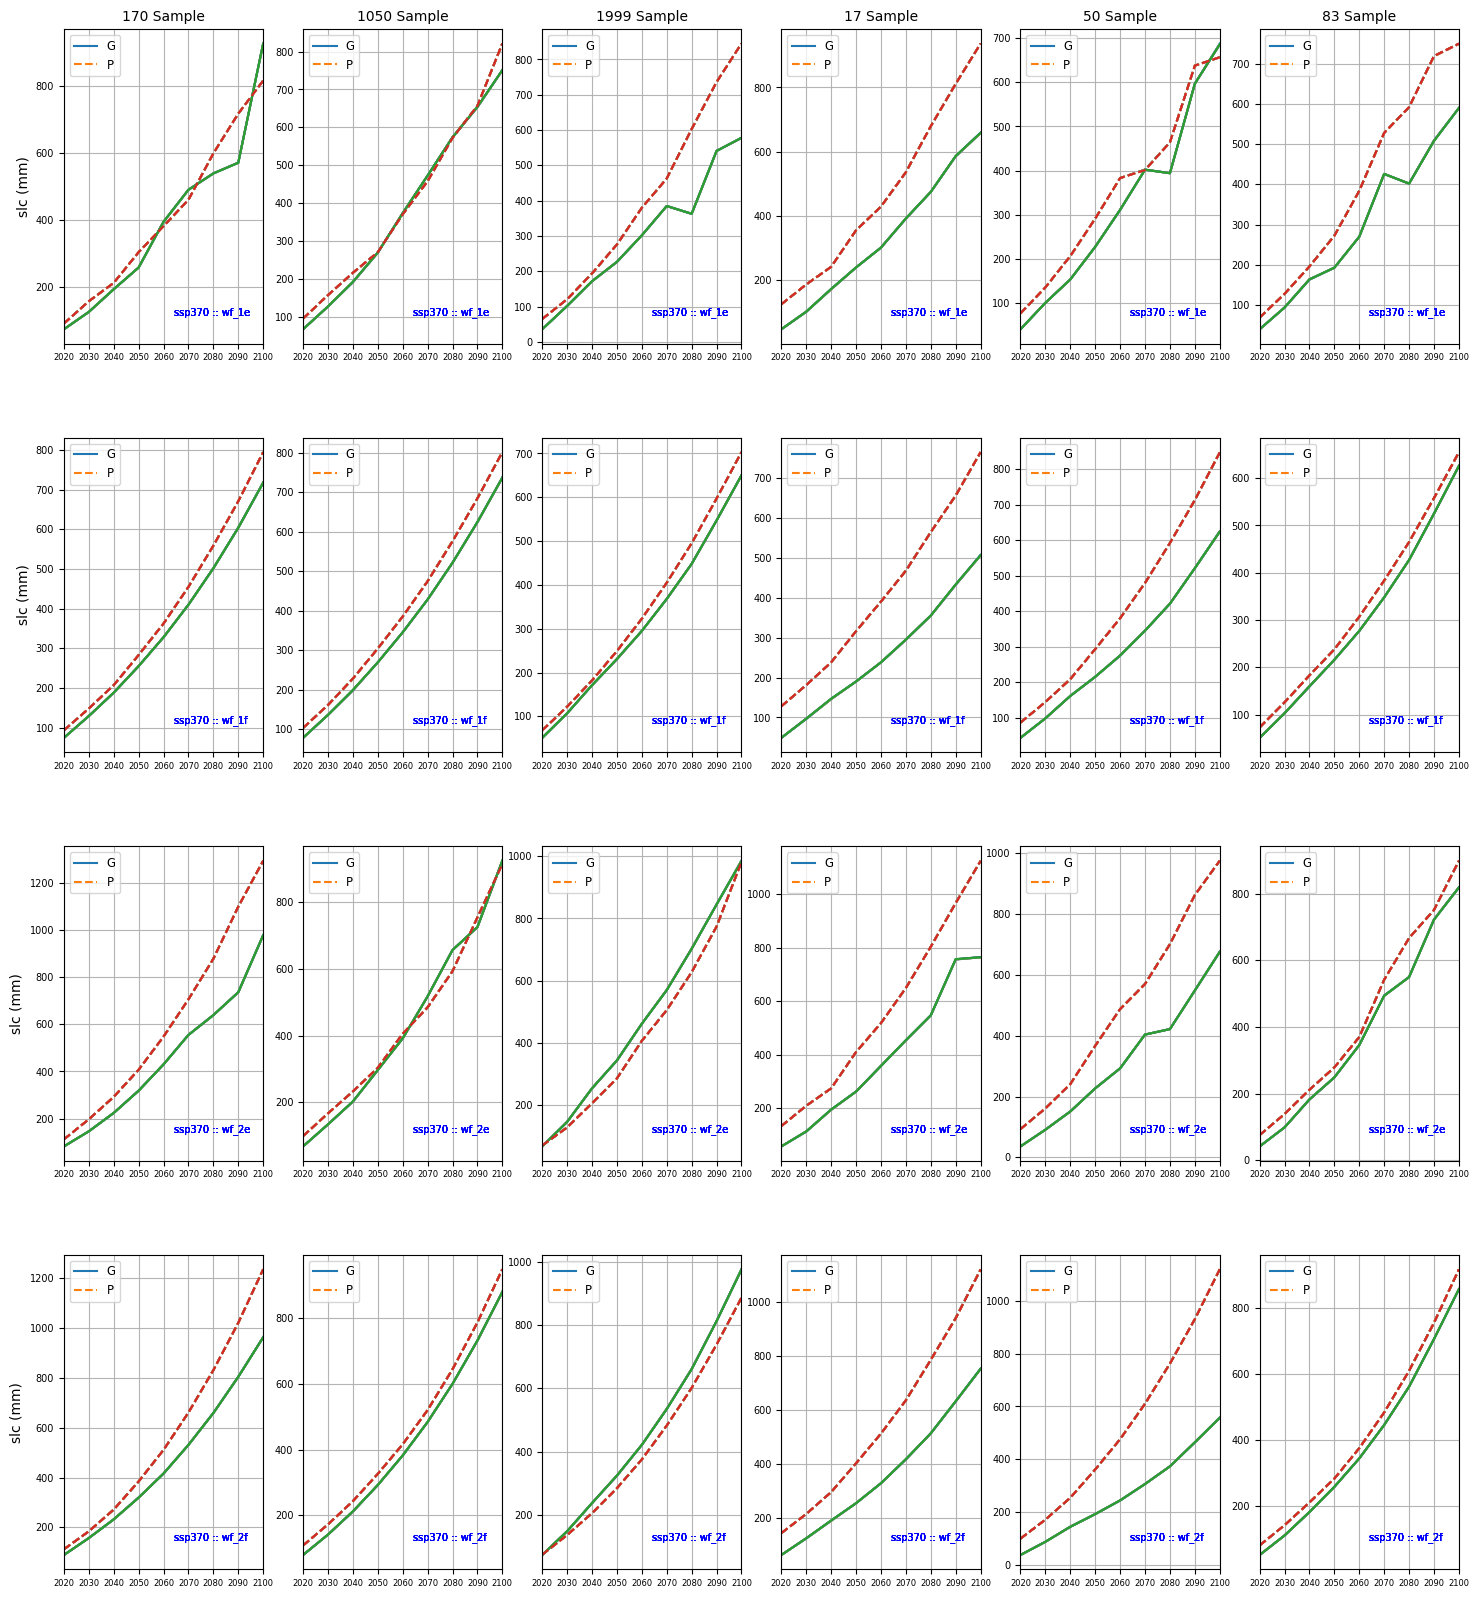

In [10]:
ssp='ssp370';       
folder='full_sample_workflows'
samp=[170,1050,1999,17,50,83] # you can choose 3 nos. Have to be below 2k. 
component="total"
loc=np.arange(0,7) #Location:: choose from 0 to 7434  

plot_full_samp_wf(ssp,folder,samp,component,loc)

### 
### ==>
### <font color=black> PLOT <b>SAMPLES</b>:: <font color=blue> SSP126 all wf </font> </font>

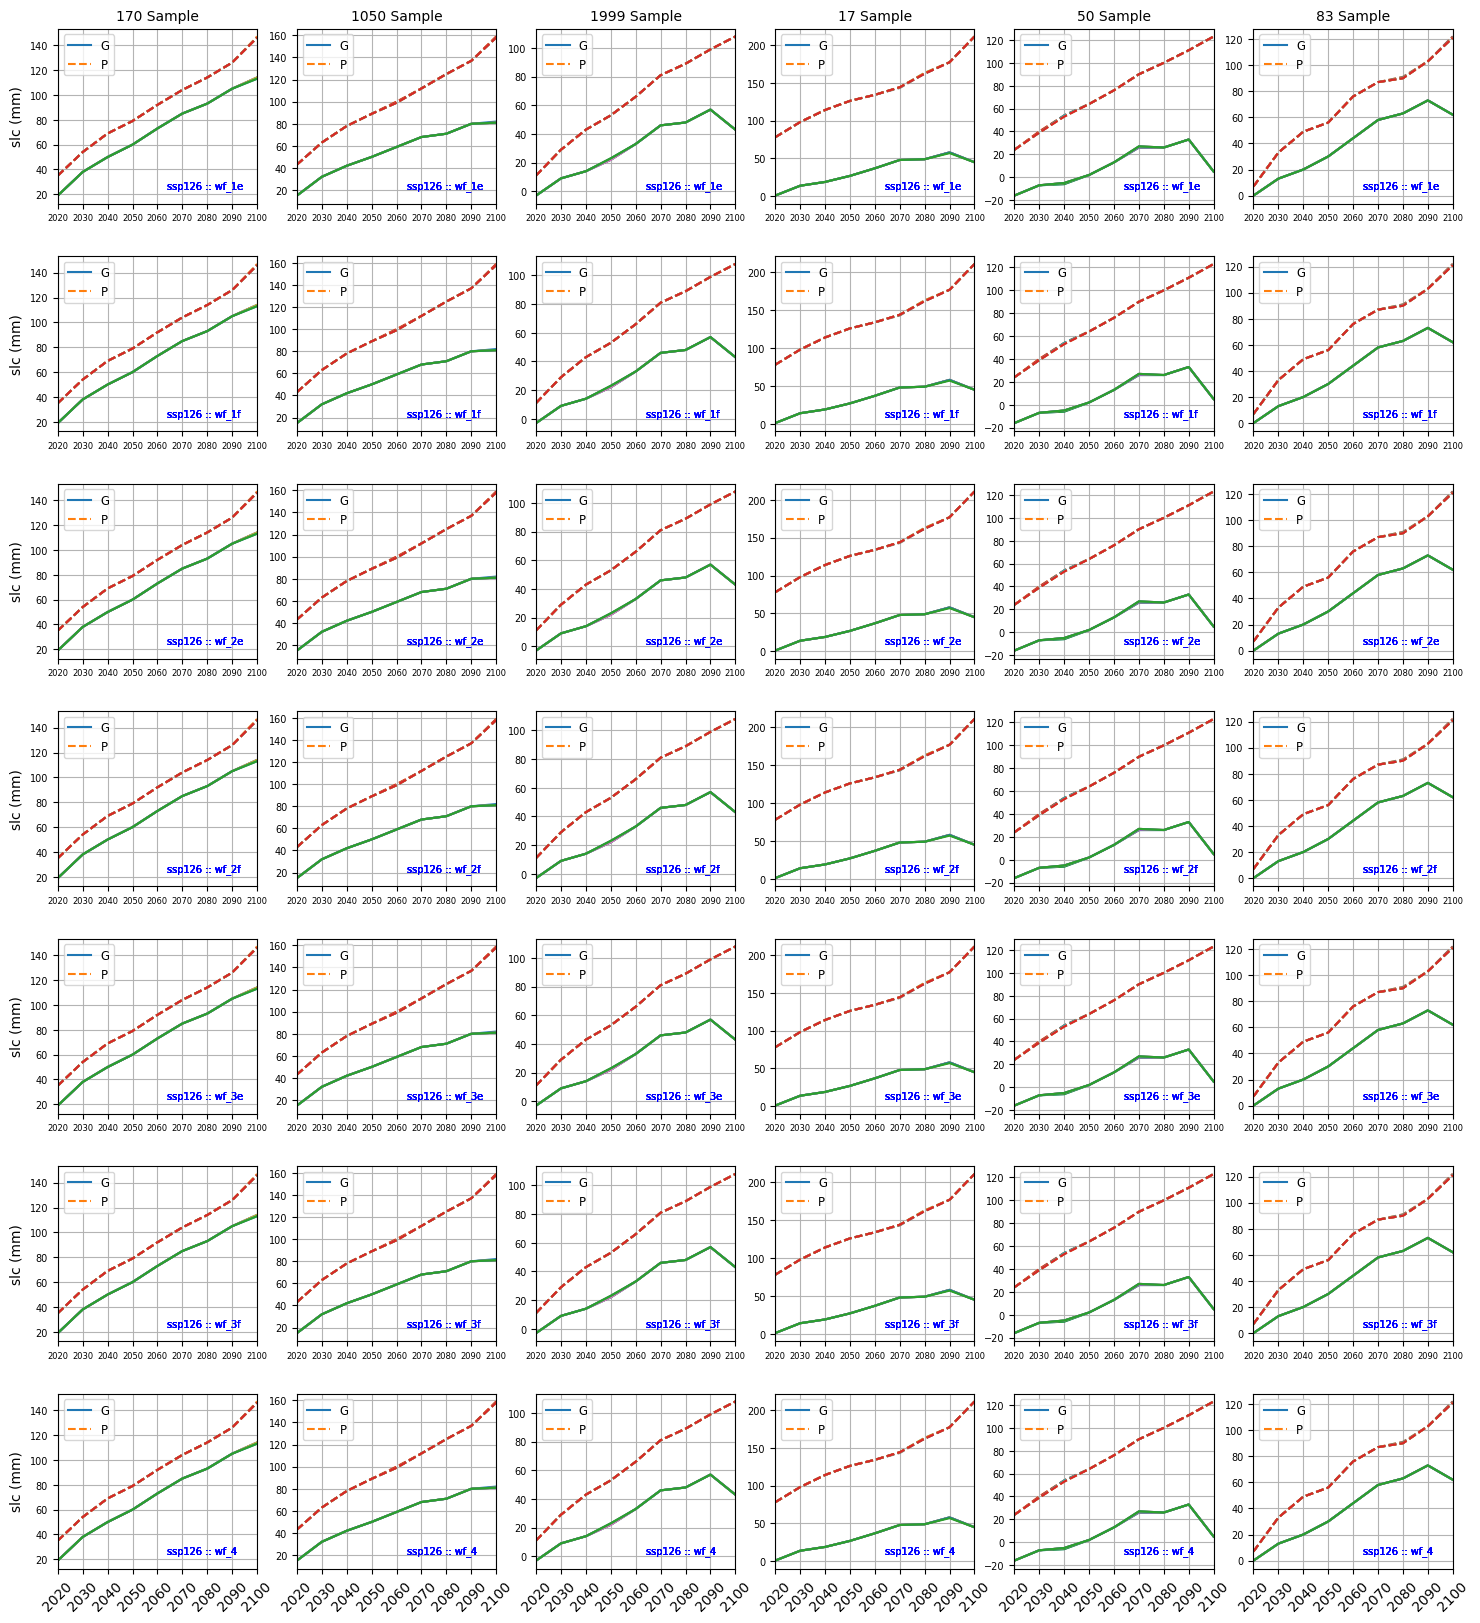

Total execution time (minutes): 0.28770398333333336


In [2]:
import datetime;    start_time = datetime.datetime.now()
#
ssp='ssp126';       WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f','wf_4']
folder='full_sample_workflows'
samp=[170,1050,1999,17,50,83] # you can choose 3 nos. Have to be below 2k. 
component="ocean"


fig, axs = plt.subplots(nrows=7, ncols=6, figsize=(12*1.5, 5*4))

for i, wf in enumerate(WF):
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    #
    fileG=fileNAME(pathG,component)#'icesheets-ipccar6-ismipemuicesheet-{arg0}_GIS_localsl.nc'.format(arg0=ssp) 
    fileP=fileNAME(pathP,component)#'nzOG.{arg0}.emuGrIS.emulandice.GrIS_localsl.nc'.format(arg0=ssp)
    var='sea_level_change'
    # labels
    EXP_G=pathG.split('/')[3].split('_')[0];   EXP_P=pathP.split('/')[4].split('-')[1];   EXP_file=fileP; 
    #
    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]
    #
    yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]
    #
    sampIDX_G, sampIDX_P=[np.searchsorted(d['samples'].values, samp) for d in [d_ncG, d_ncP]]
    #
    # loc=np.arange(0,7434) #Location:: choose from 0 to 7434
    loc=np.arange(0,7) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    # Compute the difference. 
    slcG=d_ncG[var][sampIDX_G, yrIDX_G, loc];       slcP=d_ncP[var][sampIDX_P, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1);        slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped;           diff = np.reshape(diff, slcG.shape)

    # X-axis
    xx=d_ncG['years'][yrIDX_G].values

    for sam0,sam1 in enumerate(samp):
        row, col = i, sam0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            yyD=np.squeeze(diff[sam0,:,lo0])
            yy1=np.squeeze(slcG[sam0,:,lo0])
            yy2=np.squeeze(slcP[sam0,:,lo0])
            #
            ax.plot(xx, yy1, label='G')
            ax.plot(xx, yy2, linestyle='--', label='P')
#             ax.plot(xx, yy1, label=str(latP[lo0])+" , "+str(lonP[lo0]))
            #
            ax.grid(alpha=0.95)
            ax.text(.55, .1,ssp+' :: '+wf, fontsize=7, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='x', labelsize=6)
            ax.tick_params(axis='y', labelsize=7)
            if lo0<1: 
                ax.legend(fontsize='small')
            # Xlabels
            if row==6 and col in (0, 1, 2, 3, 4, 5, 6):
                ax.tick_params(axis='x', labelrotation=45,labelsize=10)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('slc (mm)', fontsize=10); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2, 3, 4, 5):
                SAMP=str(sam1)
                ax.set_title(SAMP+' Sample' ,fontsize=10)
           
                
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

end_time = datetime.datetime.now()
execution_time = end_time - start_time
total_minutes = execution_time.total_seconds() / 60
print("Total execution time (minutes):", total_minutes)

### <font color=black> Plot:: year 2020 </font>

In [3]:
import datetime
start_time = datetime.datetime.now()


# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f','wf_4']
ssp='ssp126'

# fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='full_sample_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    keyword="vertical"
    fileG=fileNAME(pathG,keyword)#'icesheets-ipccar6-ismipemuicesheet-{arg0}_GIS_localsl.nc'.format(arg0=ssp) 
    fileP=fileNAME(pathP,keyword)#'nzOG.{arg0}.emuGrIS.emulandice.GrIS_localsl.nc'.format(arg0=ssp)
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yr=2020; #yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    # loc=np.arange(0,7434) #Location:: choose from 0 to 7434
    loc=np.arange(0,700) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][:, yrIDX_G, loc]
    slcP=d_ncP[var][:, yrIDX_P, loc]
    # slcG_reshaped = slcG.values.reshape(-1)
    # slcP_reshaped = slcP.values.reshape(-1)
    # diff = slcG_reshaped - slcP_reshaped
    # diff = np.reshape(diff, slcG.shape)

#     xx=d_ncG['years'][yrIDX_G].values

#     for pt0,pt1 in enumerate(ptile):
#         row, col = i, pt0
#         ax = axs[row, col]
        
#         for lo0,lo1 in enumerate(loc):
#             # yy1=np.squeeze(diff[pt0,:,lo0])
#             yy1=np.squeeze(slcG[pt0,:,lo0])

#             #
#             ax.plot(xx, yy1, label='')
# #             ax.plot(xx, yy1, label=str(latP[lo0])+" , "+str(lonP[lo0]))
#             #
#             ax.grid(alpha=0.95)
#             ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
#             ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
#             ax.tick_params(axis='y', labelsize=17)
#             #ax.legend(fontsize='small')
#             # Xlabels
#             if row==6 and col in (0, 1, 2):
#                 ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
#             # Ylabels
#             if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
#                 ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
#             if row==0 and col in (0, 1, 2):
#                 QUANT=str(pt1)
#                 ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)
           
                
# plt.subplots_adjust(wspace=0.2, hspace=0.3)
# plt.show()

end_time = datetime.datetime.now()
execution_time = end_time - start_time
total_minutes = execution_time.total_seconds() / 60
print("Total execution time (minutes):", total_minutes)

Total execution time (minutes): 0.039139600000000004


In [ ]:
slcG[1]                                           

In [ ]:
slcG[:,0].plot(marker='.', linestyle='')


# x=slcG['locations'].values
# y=slcG['samples'].values
# X,Y=np.meshgrid(x, y)
# c=plt.contour(X, Y, slcG)
# cbar = plt.colorbar(c)
# # plt.scatter(x, y)
# plt.show()

In [ ]:
slcP.plot()
# slcG.plot(marker='o', facecolors='blue')

In [ ]:
slcG.plot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random sample, year, and location data
samples = np.arange(1, 20001)
years = np.arange(1, 11)
locations = np.arange(1, 8001)

# Create a meshgrid of sample, year, and location combinations
samples, years, locations = np.meshgrid(samples, years, locations)

# Flatten the arrays and select a subset of data for visualization
n_points = 1000
samples = samples.flatten()[:n_points]
years = years.flatten()[:n_points]
locations = locations.flatten()[:n_points]

# Generate random data for the z-axis (can be replaced with actual data)
z_data = np.random.rand(n_points)

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples, years, locations, c=z_data, cmap='viridis')
ax.set_xlabel('Samples')
ax.set_ylabel('Year')
ax.set_zlabel('Location')
plt.title('Data Visualization')
plt.show()


In [ ]:
import datetime
start_time = datetime.datetime.now()


# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f','wf_4']
ssp='ssp126'

fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='full_sample_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    keyword="glaciers"
    fileG=fileNAME(pathG,keyword)#'icesheets-ipccar6-ismipemuicesheet-{arg0}_GIS_localsl.nc'.format(arg0=ssp) 
    fileP=fileNAME(pathP,keyword)#'nzOG.{arg0}.emuGrIS.emulandice.GrIS_localsl.nc'.format(arg0=ssp)
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yr=2020; #yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    loc=np.arange(0,7434) #Location:: choose from 0 to 7434
    # loc=np.arange(0,700) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][:, yrIDX_G, loc]
    slcP=d_ncP[var][:, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1)
    slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped
    diff = np.reshape(diff, slcG.shape)

    xx=d_ncG['years'][yrIDX_G].values

    for pt0,pt1 in enumerate(ptile):
        row, col = i, pt0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            # yy1=np.squeeze(diff[pt0,:,lo0])
            yy1=np.squeeze(slcG[pt0,:,lo0])

            #
            ax.plot(xx, yy1, label='')
#             ax.plot(xx, yy1, label=str(latP[lo0])+" , "+str(lonP[lo0]))
            #
            ax.grid(alpha=0.95)
            ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='y', labelsize=17)
            #ax.legend(fontsize='small')
            # Xlabels
            if row==6 and col in (0, 1, 2):
                ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2):
                QUANT=str(pt1)
                ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)
           
                
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

end_time = datetime.datetime.now()
execution_time = end_time - start_time
total_minutes = execution_time.total_seconds() / 60
print("Total execution time (minutes):", total_minutes)